<h1><center><u>Cat vs Dog prediction</u></center></h1>

<font size='3.5'>The objective of this project is to build a model that efficiently predicts whether the given image is cat or dog.</font>

<font size='3.5'>  </font>

<font size='3.5'>  </font>

### Importig the libraries

In [55]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import os

### Data Preprocessing

#### Preprocessing training set

In [59]:
#Importing and augumenting the dataset using ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

train_generator = train_datagen.flow_from_directory(
    'cat_dog/training_set',
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary'
)

Found 8005 images belonging to 2 classes.


#### Preprocessing test set

In [60]:
#Importing the validation dataset
test_datagen = ImageDataGenerator(
    rescale = 1./255
)

test_generator = train_datagen.flow_from_directory(
    'cat_dog/test_set',
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary'
)

Found 2023 images belonging to 2 classes.


### Building CNN

#### Initialising the CNN

In [63]:
cnn = Sequential()

#### Convolutional layer

In [69]:
cnn.add(Conv2D(filters = 32,
               kernel_size =3, 
               activation='relu',
               input_shape=[150,150,3]))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


#### Pooling

In [72]:
cnn.add(MaxPooling2D(pool_size =2, 
                  strides =2))

#### Adding second layer

In [73]:
cnn.add(Conv2D(filters = 32,
               kernel_size =3, 
               activation='relu',
               input_shape=[150,150,3]))

cnn.add(MaxPooling2D(pool_size =2, 
                  strides =2))

#### Flatenning

In [75]:
cnn.add(Flatten())

#### Full Connection

In [76]:
cnn.add(Dense(units=128, activation = 'relu'))

#### Output layer

In [77]:
cnn.add(Dense(units=1, activation = 'sigmoid'))

#### Compiling cnn

In [78]:
cnn.compile(optimizer='adam', loss='binary_crossentropy',metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


#### Training on training set and evaluating on test test

In [80]:
cnn.fit(x = train_generator,validation_data = test_generator,epochs = 50)

Epoch 1/50
251/251 [==============================] - 352s 1s/step - loss: 0.7099 - acc: 0.5730 - val_loss: 0.6303 - val_acc: 0.6095
Epoch 2/50
251/251 [==============================] - 306s 1s/step - loss: 0.5850 - acc: 0.6898 - val_loss: 0.6160 - val_acc: 0.6649
Epoch 3/50
251/251 [==============================] - 392s 2s/step - loss: 0.5575 - acc: 0.7096 - val_loss: 0.5747 - val_acc: 0.7059
Epoch 4/50
251/251 [==============================] - 413s 2s/step - loss: 0.5255 - acc: 0.7384 - val_loss: 0.5243 - val_acc: 0.7385
Epoch 5/50
251/251 [==============================] - 416s 2s/step - loss: 0.4894 - acc: 0.7628 - val_loss: 0.4972 - val_acc: 0.7538
Epoch 6/50
251/251 [==============================] - 469s 2s/step - loss: 0.4677 - acc: 0.7764 - val_loss: 0.4860 - val_acc: 0.7677
Epoch 7/50
251/251 [==============================] - 394s 2s/step - loss: 0.4500 - acc: 0.7834 - val_loss: 0.4838 - val_acc: 0.7672
Epoch 8/50
251/251 [==============================] - 353s 1s/step - 

### Making single prediction

In [82]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

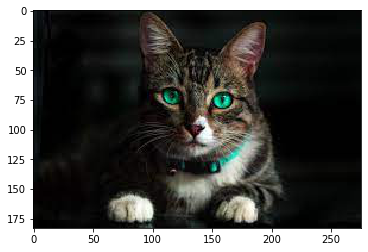

In [87]:
#Plotting the test image using matplotlib
img_arr = mpimg.imread('test.jpg')
plt.imshow(img_arr)

In [88]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('test.jpg',target_size = (150,150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

In [89]:
result = cnn.predict(test_image)

if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
    
print(prediction)

cat
